## Preprocessing and EDA

## Importing Libraries 

In [718]:
# basic functionalities
import os
import sys
import datetime
import itertools
import math

# data transforamtion and manipulation
import pandas as pd
import numpy as np
from math import sqrt
# import pandas_profiling

# prevent crazy long numpy prints
np.set_printoptions(precision=4, suppress=True)

# prevent crazy long pandas prints
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)


# remove warnings
import warnings
warnings.filterwarnings('ignore')


# plotting and plot styling
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# set params
plt.rcParams['figure.figsize'] = (16,10)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')

# statistical modeling libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


# ML basic library
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

#Img:
from IPython.display import Image


## Importing data


In [719]:
datapath_file = './105_days.parquet'
df = pd.read_parquet(datapath_file)


In [720]:
df.head()


,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
0,2023-01-01 00:00:00,66116.00000,67088.31250,237.00000,279.00000,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,0.00000,0.00000,0.00000
1,2023-01-01 00:00:01,66561.00000,68342.31250,237.00000,281.00000,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,0.00000,0.00000,0.00000
2,2023-01-01 00:00:02,66107.00000,67583.31250,237.00000,279.00000,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,0.00000,0.00000,0.00000
3,2023-01-01 00:00:03,66309.00000,67101.31250,236.00000,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,0.00000,0.00000,0.00000
4,2023-01-01 00:00:04,66309.00000,65259.31250,236.00000,281.00000,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,0.00000,0.00000,0.00000


In [721]:
df.dtypes


DateTime               datetime64[ns]
ActivePower                   float64
ReactivePower                 float64
Voltage                       float64
Current                       float64
harmonic1_Real                float64
harmonic1_Imaginary           float64
harmonic3_Real                float64
harmonic3_Imaginary           float64
harmonic5_Real                float64
harmonic5_Imaginary           float64
harmonic7_Real                float64
harmonic7_Imaginary           float64
wahing_machine                float64
dishwasher                    float64
oven                          float64
dtype: object

In [722]:
df['ActivePower'] /= 1000
df['ReactivePower'] /= 1000
df['wahing_machine'] /= 1000
df['dishwasher'] /= 1000
df['oven'] /= 1000


# Data Preprocessing and Exploratory Data Analysis (EDA)

## __Converting to datetime format and sort:__

In [723]:
# convert:
df['DateTime'] = pd.to_datetime(df['DateTime'])
# sort:
df = df.sort_values(by=['DateTime'], axis=0, ascending=True)
df.dtypes


DateTime               datetime64[ns]
ActivePower                   float64
ReactivePower                 float64
Voltage                       float64
Current                       float64
harmonic1_Real                float64
harmonic1_Imaginary           float64
harmonic3_Real                float64
harmonic3_Imaginary           float64
harmonic5_Real                float64
harmonic5_Imaginary           float64
harmonic7_Real                float64
harmonic7_Imaginary           float64
wahing_machine                float64
dishwasher                    float64
oven                          float64
dtype: object

In [724]:
df.shape


(9072000, 16)

In [725]:
df.head()


,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
0,2023-01-01 00:00:00,66.11600,67.08831,237.00000,279.00000,13.00000,-300.00000,17.00000,-55.00000,-16.00000,-21.00000,-9.00000,-8.00000,0.00000,0.00000,0.00000
1,2023-01-01 00:00:01,66.56100,68.34231,237.00000,281.00000,13.00000,-302.00000,17.00000,-55.00000,-16.00000,-22.00000,-6.00000,-18.00000,0.00000,0.00000,0.00000
2,2023-01-01 00:00:02,66.10700,67.58331,237.00000,279.00000,13.00000,-301.00000,16.00000,-55.00000,-16.00000,-22.00000,-13.00000,-13.00000,0.00000,0.00000,0.00000
3,2023-01-01 00:00:03,66.30900,67.10131,236.00000,281.00000,16.00000,-297.00000,17.00000,-54.00000,-15.00000,-22.00000,-6.00000,-7.00000,0.00000,0.00000,0.00000
4,2023-01-01 00:00:04,66.30900,65.25931,236.00000,281.00000,15.00000,-300.00000,17.00000,-54.00000,-16.00000,-22.00000,-3.00000,-15.00000,0.00000,0.00000,0.00000


In [726]:
df.dtypes


DateTime               datetime64[ns]
ActivePower                   float64
ReactivePower                 float64
Voltage                       float64
Current                       float64
harmonic1_Real                float64
harmonic1_Imaginary           float64
harmonic3_Real                float64
harmonic3_Imaginary           float64
harmonic5_Real                float64
harmonic5_Imaginary           float64
harmonic7_Real                float64
harmonic7_Imaginary           float64
wahing_machine                float64
dishwasher                    float64
oven                          float64
dtype: object

In [727]:
df.describe()


,DateTime,ActivePower,ReactivePower,Voltage,Current,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven
count,9072000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000,9072000.00000
mean,2023-02-22 11:59:59.499976448,259.92478,72.56988,234.48259,839.26380,-4.40645,-1209.78415,26.10631,-84.17444,-13.41147,-21.86635,-7.03521,-11.00812,13.72150,35.22077,12.01732
min,2023-01-01 00:00:00,0.00000,-763.30775,226.00000,215.00000,-4074.00000,-28129.00000,-695.00000,-1070.00000,-223.00000,-264.00000,-150.00000,-151.00000,0.00000,0.00000,0.00000
25%,2023-01-27 05:59:59.750000128,72.84600,55.77600,233.00000,305.00000,-91.00000,-965.00000,15.00000,-100.00000,-17.00000,-26.00000,-10.00000,-16.00000,0.00000,0.00000,0.00000
50%,2023-02-22 11:59:59.500000,132.47700,66.45431,234.00000,560.00000,10.00000,-611.00000,21.00000,-62.00000,-14.00000,-19.00000,-6.00000,-10.00000,0.00000,0.00000,0.00000
75%,2023-03-20 17:59:59.249999872,208.37100,79.76900,236.00000,751.00000,46.00000,-331.00000,36.00000,-48.00000,-9.00000,-13.00000,-3.00000,-6.00000,0.00000,0.00000,0.00000
max,2023-04-15 23:59:59,5962.83200,1590.07625,240.00000,18942.00000,1208.00000,81.00000,487.00000,416.00000,121.00000,183.00000,94.00000,70.00000,1924.37800,2026.09100,1426.67300
std,NaN,460.49216,42.52092,1.48292,1167.00240,157.41971,2169.44597,31.10213,60.16534,12.56519,16.32026,7.48746,8.79185,140.09371,257.92428,125.18398


## __Removal duplicates__:

In [728]:
#keep only the last measurement for datetime
df.drop_duplicates(subset='DateTime', keep='last', inplace=True)


In [729]:
print('Time period start: {}\nTime period end: {}'.format(df.DateTime.min(),df.DateTime.max()))


Time period start: 2023-01-01 00:00:00
Time period end: 2023-04-15 23:59:59


## __Setting index as the datetime column for easier manipulations:__

In [730]:
df = df.set_index('DateTime')
print(f'df.index.freq is: {df.index.freq}')


df.index.freq is: None


__Note:__
- datetime index's frequency is None => there are some missing data points somewhere (otherwise Python could deduce it) => remove missing 

## __Find and Fill Missing datetime Instances__

In [731]:
# ideal range: without missing data
date_range = pd.date_range(start=min(df.index), end=max(df.index), freq='S')


In [732]:
min(df.index), max(df.index),


(Timestamp('2023-01-01 00:00:00'), Timestamp('2023-04-15 23:59:59'))

In [733]:
print(f'The difference in length between the ideal date range and our dataset is: {(len(date_range)-len(df))}:')


The difference in length between the ideal date range and our dataset is: 0:


In [734]:
print("missing data in:", date_range.difference(df.index))


missing data in: DatetimeIndex([], dtype='datetime64[ns]', freq='s')


In [735]:
#Reindex the dataset and then fill data:

#Create null values in missing data:
df = df.reindex(date_range)

#Filling  missing  with linear interpolation between existing data points
for col in df.columns:
    df[col].interpolate(method='linear', inplace=True)

# now we have a neatly continuous datetime index
print(f'The df.index.freq is now: {df.index.freq}, => we no have missing instances')


The df.index.freq is now: <Second>, => we no have missing instances


### Resample every n seconds extracting new features

In [736]:
from scipy.fft import fft

# Assuming your original dataset is named 'original_data' with a datetime index and columns like 'Voltage', 'Current', etc.

# Define a function to calculate features for each 30-second interval
def calculate_features(interval_data):
    features = {
        'Voltage': interval_data['Voltage'].mean(),
        'Current': interval_data['Current'].mean(),
        'ActivePower': interval_data['ActivePower'].mean(),
        'ReactivePower': interval_data['ReactivePower'].mean(),
        'harmonic1_Real': interval_data['harmonic1_Real'].mean(),
        'harmonic1_Imaginary': interval_data['harmonic1_Imaginary'].mean(),
        'harmonic3_Real': interval_data['harmonic3_Real'].mean(),
        'harmonic3_Imaginary': interval_data['harmonic3_Imaginary'].mean(),
        'harmonic5_Real': interval_data['harmonic5_Real'].mean(),
        'harmonic5_Imaginary': interval_data['harmonic5_Imaginary'].mean(),
        'harmonic7_Real': interval_data['harmonic7_Real'].mean(),
        'harmonic7_Imaginary': interval_data['harmonic7_Imaginary'].mean(),
        'wahing_machine': interval_data['wahing_machine'].mean(),
        'dishwasher': interval_data['dishwasher'].mean(),
        'oven': interval_data['oven'].mean(),
        'Dominant_Frequency': get_dominant_frequency(interval_data['Current'].values),  # Add frequency feature
        'Dominant_Period': 1 / get_dominant_frequency(interval_data['Current'].values),  # Add period feature
        'Std_Current': interval_data['Current'].std(),
        'Total_Energy': np.sum(interval_data['Current'].values**2),
        'maxActPower': interval_data['ActivePower'].max(),
        'maxReactPower': interval_data['ReactivePower'].max(),
        'maxCurrent': interval_data['Current'].max(),
        'maxHarmonic1_Real': interval_data['harmonic1_Real'].max(),
        'maxHarmonic1_Imaginary': interval_data['harmonic1_Imaginary'].max(),
        'maxHarmonic3_Real': interval_data['harmonic3_Real'].max(),
        'maxHarmonic3_Imaginary': interval_data['harmonic3_Imaginary'].max(),
        'maxHarmonic5_Real': interval_data['harmonic5_Real'].max(),
        'maxHarmonic5_Imaginary': interval_data['harmonic5_Imaginary'].max(),
        'maxHarmonic7_Real': interval_data['harmonic7_Real'].max(),
        'maxHarmonic7_Imaginary': interval_data['harmonic7_Imaginary'].max(),
        # Add other feature calculations as needed
    }
    return pd.Series(features)

# Function to get dominant frequency using Fourier Transform
def get_dominant_frequency(signal):
    N = len(signal)
    frequencies = np.fft.fftfreq(N)
    fft_values = fft(signal)
    dominant_frequency = frequencies[np.argmax(np.abs(fft_values[1:N//2]))]
    return dominant_frequency

# Group data into 30-second intervals
df = df.resample('30S')

# Apply the feature calculation function to each interval
df = df.apply(calculate_features)

In [737]:
df.head()


,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary
2023-01-01 00:00:00,236.10000,280.26667,66.15917,66.64568,14.60000,-301.10000,16.33333,-54.93333,-15.66667,-22.13333,-7.33333,-12.60000,0.00000,0.00000,0.00000,0.10000,10.00000,1.92861,2356590.00000,67.25400,68.37631,285.00000,17.00000,-295.00000,17.00000,-53.00000,-15.00000,-21.00000,-2.00000,-7.00000
2023-01-01 00:00:30,236.00000,280.33333,66.14803,67.02518,11.30000,-301.36667,15.70000,-55.46667,-16.03333,-21.96667,-7.90000,-13.10000,0.00000,0.00000,0.00000,0.00000,inf,2.98656,2357862.00000,67.72200,68.42131,287.00000,15.00000,-295.00000,17.00000,-54.00000,-15.00000,-19.00000,-2.00000,-6.00000
2023-01-01 00:01:00,236.00000,280.00000,66.07277,66.78661,11.06667,-301.20000,15.86667,-55.50000,-16.00000,-22.03333,-5.60000,-12.53333,0.00000,0.00000,0.00000,0.03333,30.00000,2.66523,2352206.00000,67.72600,68.21231,287.00000,13.00000,-297.00000,16.00000,-54.00000,-15.00000,-21.00000,-2.00000,-7.00000
2023-01-01 00:01:30,236.83333,279.06667,66.08220,67.13501,9.90000,-299.86667,16.50000,-55.00000,-16.00000,-21.90000,-9.20000,-12.26667,0.00000,0.00000,0.00000,0.03333,30.00000,2.37709,2336510.00000,67.54400,68.13331,285.00000,13.00000,-292.00000,18.00000,-53.00000,-15.00000,-21.00000,-2.00000,-7.00000
2023-01-01 00:02:00,236.76667,278.80000,65.99967,67.19788,9.26667,-300.03333,16.13333,-55.10000,-16.13333,-21.66667,-6.60000,-11.96667,0.00000,0.00000,0.00000,0.43333,2.30769,1.76947,2331974.00000,66.59600,68.10231,281.00000,12.00000,-295.00000,18.00000,-54.00000,-15.00000,-20.00000,-2.00000,-7.00000


In [738]:
df.shape


(302400, 30)

## Extracting Time Features

- We split datetime into its different __features__ => to find patterns for different groups.

In [739]:
df['dayofweek'] = df.index.dayofweek
df['dayofyear'] = df.index.dayofyear
df['year'] = df.index.year
df['month'] = df.index.month
df['quarter'] = df.index.quarter
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['weekofyear'] = df.index.dayofyear//7
df['dayofmonth'] = df.index.day # Day of Month
df['date'] = df.index.date

# let's add the season number
df['season'] = df['month'].apply(lambda month_number: (month_number%12 + 3)//3)


In [740]:
df.head()


,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,date,season
2023-01-01 00:00:00,236.10000,280.26667,66.15917,66.64568,14.60000,-301.10000,16.33333,-54.93333,-15.66667,-22.13333,-7.33333,-12.60000,0.00000,0.00000,0.00000,0.10000,10.00000,1.92861,2356590.00000,67.25400,68.37631,285.00000,17.00000,-295.00000,17.00000,-53.00000,-15.00000,-21.00000,-2.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:30,236.00000,280.33333,66.14803,67.02518,11.30000,-301.36667,15.70000,-55.46667,-16.03333,-21.96667,-7.90000,-13.10000,0.00000,0.00000,0.00000,0.00000,inf,2.98656,2357862.00000,67.72200,68.42131,287.00000,15.00000,-295.00000,17.00000,-54.00000,-15.00000,-19.00000,-2.00000,-6.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:01:00,236.00000,280.00000,66.07277,66.78661,11.06667,-301.20000,15.86667,-55.50000,-16.00000,-22.03333,-5.60000,-12.53333,0.00000,0.00000,0.00000,0.03333,30.00000,2.66523,2352206.00000,67.72600,68.21231,287.00000,13.00000,-297.00000,16.00000,-54.00000,-15.00000,-21.00000,-2.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:01:30,236.83333,279.06667,66.08220,67.13501,9.90000,-299.86667,16.50000,-55.00000,-16.00000,-21.90000,-9.20000,-12.26667,0.00000,0.00000,0.00000,0.03333,30.00000,2.37709,2336510.00000,67.54400,68.13331,285.00000,13.00000,-292.00000,18.00000,-53.00000,-15.00000,-21.00000,-2.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:02:00,236.76667,278.80000,65.99967,67.19788,9.26667,-300.03333,16.13333,-55.10000,-16.13333,-21.66667,-6.60000,-11.96667,0.00000,0.00000,0.00000,0.43333,2.30769,1.76947,2331974.00000,66.59600,68.10231,281.00000,12.00000,-295.00000,18.00000,-54.00000,-15.00000,-20.00000,-2.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1


In [741]:
df.tail()


,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,date,season
2023-04-15 23:57:30,235.93333,602.06667,140.75300,139.79886,-121.73333,-649.63333,17.93333,-39.96667,-16.00000,-10.73333,-7.56667,-3.86667,0.00000,0.00000,0.00000,0.43333,2.30769,3.81407,10874950.00000,142.90600,143.30039,611.00000,-117.00000,-638.00000,20.00000,-37.00000,-15.00000,-9.00000,-2.00000,1.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:58:00,235.86667,600.26667,140.22397,140.25979,-122.73333,-647.00000,17.73333,-40.70000,-16.16667,-10.90000,-6.63333,-3.83333,0.00000,0.00000,0.00000,0.40000,2.50000,3.21562,10809902.00000,141.58400,143.19139,605.00000,-118.00000,-637.00000,19.00000,-38.00000,-16.00000,-10.00000,-2.00000,1.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:58:30,235.96667,600.46667,140.30653,140.43582,-127.16667,-646.93333,16.96667,-41.43333,-16.66667,-10.76667,-7.66667,-3.36667,0.00000,0.00000,0.00000,0.00000,inf,3.40115,10817142.00000,141.82900,142.64639,607.00000,-122.00000,-635.00000,18.00000,-39.00000,-16.00000,-10.00000,-2.00000,1.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:00,235.93333,597.80000,139.58547,140.91392,-125.80000,-643.90000,17.33333,-41.70000,-16.76667,-10.73333,-7.73333,-3.23333,0.00000,0.00000,0.00000,0.00000,inf,2.20345,10721086.00000,140.69000,142.54439,601.00000,-121.00000,-639.00000,19.00000,-39.00000,-16.00000,-9.00000,-2.00000,1.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2
2023-04-15 23:59:30,235.20000,595.20000,138.67687,139.81469,-122.30000,-640.96667,17.76667,-41.36667,-16.26667,-10.93333,-6.36667,-3.86667,0.00000,0.00000,0.00000,0.00000,inf,2.94080,10628142.00000,141.10800,142.25639,603.00000,-117.00000,-635.00000,19.00000,-40.00000,-16.00000,-10.00000,-2.00000,1.00000,5,105,2023,4,2,23,5,15,15,2023-04-15,2


In [742]:
%matplotlib inline
import matplotlib.pyplot as plt


In [743]:
# aggregated data
gr_hour_season = df.groupby(['hour', 'season']).agg({'ActivePower':'median'})
gr_hour_season.head()


ActivePower
hour season             
0    1         106.04287
     2         113.65103
1    1          66.13077
     2          66.11783
2    1          65.06550

In [744]:
gr_dayofweek_season = df.groupby(['dayofweek', 'season'], as_index=False).agg({'ActivePower':'median'})
gr_dayofweek_season.head()


,dayofweek,season,ActivePower
0,0,1,132.55800
1,0,2,129.40310
2,1,1,135.58417
3,1,2,132.97737
4,2,1,132.67627


In [745]:
gr_dayofweek_season['dayofweek_name'] = gr_dayofweek_season.dayofweek.map({ 0:'lunedi',
                                                                            1:'martedi',
                                                                            2:'mercoledi',
                                                                            3:'giovedi',
                                                                            4:'venerdi',
                                                                            5:'sabato',
                                                                            6:'domenica',
                                                                         })


In [746]:
gr_dayofweek_season.head()


,dayofweek,season,ActivePower,dayofweek_name
0,0,1,132.55800,lunedi
1,0,2,129.40310,lunedi
2,1,1,135.58417,martedi
3,1,2,132.97737,martedi
4,2,1,132.67627,mercoledi


## Unbalanced data

In [747]:
y_wm = (df['wahing_machine']>0).astype(int)
y_dw = (df['dishwasher']>0).astype(int)
y_ow = (df['oven']>0).astype(int)


In [748]:
drop_cols = ['wahing_machine', 'dishwasher', 'oven', 'date']
X =  df.drop(drop_cols, axis=1)


In [749]:
X.dtypes


Voltage                   float64
Current                   float64
ActivePower               float64
ReactivePower             float64
harmonic1_Real            float64
harmonic1_Imaginary       float64
harmonic3_Real            float64
harmonic3_Imaginary       float64
harmonic5_Real            float64
harmonic5_Imaginary       float64
harmonic7_Real            float64
harmonic7_Imaginary       float64
Dominant_Frequency        float64
Dominant_Period           float64
Std_Current               float64
Total_Energy              float64
maxActPower               float64
maxReactPower             float64
maxCurrent                float64
maxHarmonic1_Real         float64
maxHarmonic1_Imaginary    float64
maxHarmonic3_Real         float64
maxHarmonic3_Imaginary    float64
maxHarmonic5_Real         float64
maxHarmonic5_Imaginary    float64
maxHarmonic7_Real         float64
maxHarmonic7_Imaginary    float64
dayofweek                   int32
dayofyear                   int32
year          

In [750]:
X.describe()


,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,season
count,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000,302400.00000
mean,234.48259,839.26380,259.92478,72.56988,-4.40645,-1209.78415,26.10631,-84.17444,-13.41147,-21.86635,-7.03521,-11.00812,0.12186,inf,64.65849,61987745.20340,292.85221,79.89852,949.07074,9.56351,-1100.50142,30.28486,-78.73860,-10.95806,-19.37944,-0.93250,-5.01558,3.00000,53.00000,2023.00000,2.28571,1.14286,11.50000,3.00000,7.14286,14.45714,1.43810
std,1.43205,1109.57526,449.80103,41.26940,150.42410,2118.90143,29.01686,59.21117,11.72984,15.94027,6.07406,7.86101,0.15263,NaN,362.03493,232900040.75589,512.78302,58.02113,1381.76096,143.73272,1985.24953,27.93641,57.26599,9.95949,15.95255,4.73267,7.44235,2.00000,30.30956,0.00000,1.03936,0.34993,6.92220,2.00000,4.33465,8.64103,0.49615
min,229.20000,219.73333,51.33813,-9.50135,-1926.03333,-26907.50000,-614.76667,-836.30000,-164.46667,-190.16667,-87.20000,-90.06667,0.00000,2.30769,0.00000,1448662.00000,52.42400,3.61050,225.00000,-1910.00000,-24590.00000,-610.00000,-779.00000,-140.00000,-181.00000,-74.00000,-78.00000,0.00000,1.00000,2023.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
25%,233.46667,311.46667,74.11300,55.94200,-91.63333,-1009.50000,14.86667,-99.40000,-17.10000,-25.96667,-8.40000,-13.56667,0.00000,4.28571,2.51181,2912992.00000,79.76575,58.42600,322.00000,-82.00000,-845.00000,17.00000,-93.00000,-16.00000,-23.00000,-3.00000,-8.00000,1.00000,27.00000,2023.00000,1.00000,1.00000,5.75000,1.00000,3.00000,7.00000,1.00000
50%,234.43333,560.80000,133.05403,66.60041,9.60000,-612.91667,20.86667,-62.90000,-14.33333,-19.43333,-6.56667,-10.70000,0.03333,30.00000,3.08426,9450900.00000,136.56900,68.49131,575.00000,16.00000,-598.00000,23.00000,-57.00000,-13.00000,-18.00000,-1.00000,-5.00000,3.00000,53.00000,2023.00000,2.00000,1.00000,11.50000,3.00000,7.00000,14.00000,1.00000
75%,235.50000,759.55833,218.87852,80.13489,45.20000,-338.00000,35.43333,-48.26667,-9.03333,-13.33333,-4.50000,-5.43333,0.23333,NaN,4.82200,17645908.00000,232.23200,84.92331,833.00000,55.00000,-318.00000,39.00000,-46.00000,-7.00000,-11.00000,0.00000,0.00000,5.00000,79.00000,2023.00000,3.00000,1.00000,17.25000,5.00000,11.00000,22.00000,2.00000
max,238.76667,15111.50000,5674.88503,659.27972,749.03333,-237.73333,450.73333,214.43333,59.13333,131.00000,17.13333,40.56667,0.43333,inf,6186.36294,6850750269.00000,5962.83200,1590.07625,18942.00000,1208.00000,81.00000,487.00000,416.00000,121.00000,183.00000,94.00000,70.00000,6.00000,105.00000,2023.00000,4.00000,2.00000,23.00000,6.00000,15.00000,31.00000,2.00000


In [751]:
y_wm.head()

2023-01-01 00:00:00    0
2023-01-01 00:00:30    0
2023-01-01 00:01:00    0
2023-01-01 00:01:30    0
2023-01-01 00:02:00    0
Freq: 30s, Name: wahing_machine, dtype: int64

In [752]:
y_wm.value_counts()


wahing_machine
0    290435
1     11965
Name: count, dtype: int64

In [753]:
y_dw.value_counts()


dishwasher
0    294201
1      8199
Name: count, dtype: int64

In [754]:
y_ow.value_counts()


oven
0    298604
1      3796
Name: count, dtype: int64

In [755]:
y_wm_month = pd.concat([y_wm, df['month']], axis=1)

In [756]:
print(y_wm_month.groupby(['month', 'wahing_machine']).size().unstack(fill_value=0))

wahing_machine      0     1
month                      
1               85331  3949
2               78355  2285
3               85594  3686
4               41155  2045


In [757]:
y_dw_month = pd.concat([y_dw, df['month']], axis=1)

In [758]:
print(y_dw_month.groupby(['month', 'dishwasher']).size().unstack(fill_value=0))

dishwasher      0     1
month                  
1           87244  2036
2           78216  2424
3           86646  2634
4           42095  1105


In [759]:
y_ow_month = pd.concat([y_ow, df['month']], axis=1)

In [760]:
print(y_ow_month.groupby(['month', 'oven']).size().unstack(fill_value=0))

oven       0     1
month             
1      88086  1194
2      79594  1046
3      88245  1035
4      42679   521


In [761]:
print(y_ow_month.groupby(['month', 'oven']).size().unstack(fill_value=0))

oven       0     1
month             
1      88086  1194
2      79594  1046
3      88245  1035
4      42679   521


In [762]:
Y = pd.concat([y_wm, y_dw, y_ow], axis=1)


In [763]:
Y.head()


,wahing_machine,dishwasher,oven
2023-01-01 00:00:00,0,0,0
2023-01-01 00:00:30,0,0,0
2023-01-01 00:01:00,0,0,0
2023-01-01 00:01:30,0,0,0
2023-01-01 00:02:00,0,0,0


<Axes: xlabel='wahing_machine,dishwasher,oven'>

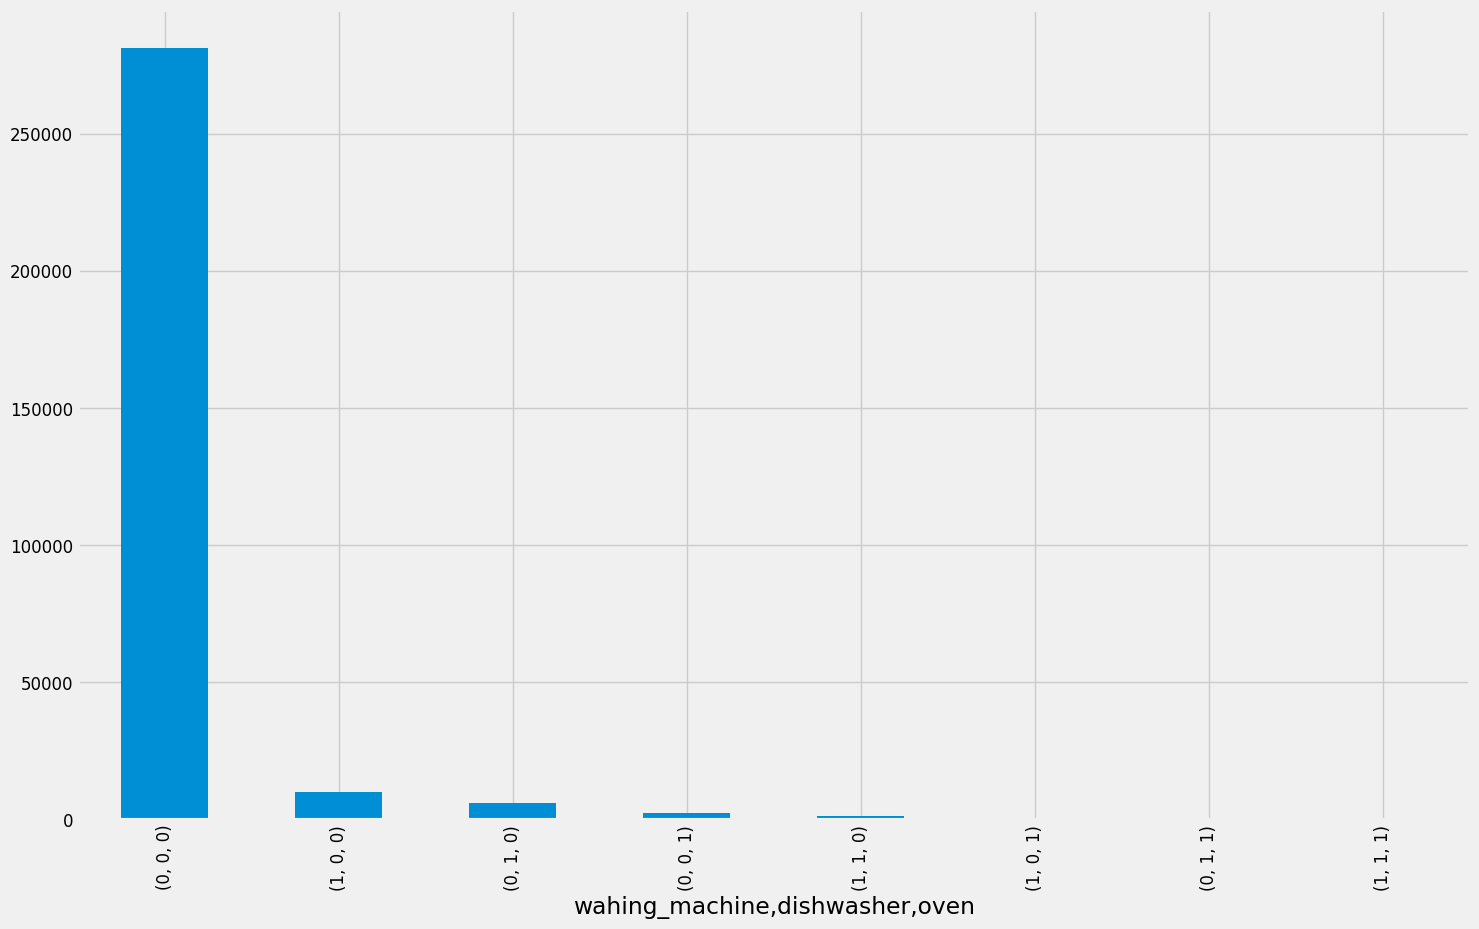

In [764]:
Y.value_counts().plot(kind='bar')


In [765]:
Y['label'] = Y[['wahing_machine','dishwasher','oven']].apply(lambda row: int(''.join(map(str, row)), 2), axis=1)


In [766]:
print(Y[Y['label']==4])


                     wahing_machine  dishwasher  oven  label
2023-01-02 18:04:00               1           0     0      4
2023-01-02 18:04:30               1           0     0      4
2023-01-02 18:05:00               1           0     0      4
2023-01-02 18:05:30               1           0     0      4
2023-01-02 18:06:00               1           0     0      4
...                             ...         ...   ...    ...
2023-04-15 08:34:30               1           0     0      4
2023-04-15 08:35:00               1           0     0      4
2023-04-15 08:35:30               1           0     0      4
2023-04-15 08:36:00               1           0     0      4
2023-04-15 08:36:30               1           0     0      4

[9916 rows x 4 columns]


In [767]:
Y['label_str'] = Y['label'].map({0:'AO',
                                1:'OW',
                                2:'DW',
                                3:'DW_OW',
                                4:'WM',
                                5:'WM_OW',
                                6:'WM_DW',
                                7:'WM_DW_OW',
                                })
Y['label_str']


2023-01-01 00:00:00    AO
2023-01-01 00:00:30    AO
2023-01-01 00:01:00    AO
2023-01-01 00:01:30    AO
2023-01-01 00:02:00    AO
                       ..
2023-04-15 23:57:30    AO
2023-04-15 23:58:00    AO
2023-04-15 23:58:30    AO
2023-04-15 23:59:00    AO
2023-04-15 23:59:30    AO
Freq: 30s, Name: label_str, Length: 302400, dtype: object

In [768]:
y_analysis = pd.concat([Y, df['ActivePower'], df['ReactivePower'], df['harmonic1_Real'], df['harmonic1_Imaginary'], df['harmonic3_Real'], df['harmonic3_Imaginary'], df['harmonic5_Real'], df['harmonic5_Imaginary'], df['harmonic7_Real'], df['harmonic7_Imaginary'], df['Voltage'], df['Current']], axis=1)

## Add a new features

### Instant Power

In [769]:
y_analysis['instant_power'] = y_analysis['ActivePower'] * y_analysis['ReactivePower']


### Apparent Power

In [770]:
y_analysis['ApparentPower'] = (y_analysis['ActivePower']**2 + y_analysis['ReactivePower']**2)**0.5

### Power Factor

In [771]:
y_analysis['PowerFactor'] = np.cos(np.arccos(y_analysis['ActivePower'] / y_analysis['ApparentPower']))

### Total Harmonic Distortion (THD)

In [772]:
harmonics_columns = ['harmonic1_Real', 'harmonic1_Imaginary', 'harmonic3_Real', 'harmonic3_Imaginary',
                     'harmonic5_Real', 'harmonic5_Imaginary', 'harmonic7_Real', 'harmonic7_Imaginary']

harmonics_square_sum = np.sum(y_analysis[harmonics_columns] ** 2, axis=1)
y_analysis['THD'] = np.sqrt(harmonics_square_sum) / y_analysis['ActivePower']

### Harmonic Distortion Index

In [773]:
y_analysis['HarmonicDistortionIndex'] = np.sum(np.sqrt(y_analysis[harmonics_columns] ** 2), axis=1)

### Power Fluctuation

In [774]:
y_analysis['Power Fluctuations'] = y_analysis['ActivePower'].diff() / y_analysis.index.to_series().diff().dt.total_seconds()

# Fill NaN values in the first row (resulting from the diff operation)
y_analysis['Power Fluctuations'].iloc[0] = 0.0


### Resistance

In [775]:
y_analysis['Resistance'] = y_analysis['Voltage'] / y_analysis['Current']

In [776]:
y_analysis.head()

,wahing_machine,dishwasher,oven,label,label_str,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance
2023-01-01 00:00:00,0,0,0,0,AO,66.15917,66.64568,14.60000,-301.10000,16.33333,-54.93333,-15.66667,-22.13333,-7.33333,-12.60000,236.10000,280.26667,4409.22260,93.90784,0.70451,4.66139,444.70000,0.00000,0.84241
2023-01-01 00:00:30,0,0,0,0,AO,66.14803,67.02518,11.30000,-301.36667,15.70000,-55.46667,-16.03333,-21.96667,-7.90000,-13.10000,236.00000,280.33333,4433.58379,94.16972,0.70243,4.66559,442.83333,-0.00037,0.84185
2023-01-01 00:01:00,0,0,0,0,AO,66.07277,66.78661,11.06667,-301.20000,15.86667,-55.50000,-16.00000,-22.03333,-5.60000,-12.53333,236.00000,280.00000,4412.77626,93.94712,0.70330,4.66746,439.80000,-0.00251,0.84286
2023-01-01 00:01:30,0,0,0,0,AO,66.08220,67.13501,9.90000,-299.86667,16.50000,-55.00000,-16.00000,-21.90000,-9.20000,-12.26667,236.83333,279.06667,4436.42932,94.20174,0.70150,4.64664,440.63333,0.00031,0.84866
2023-01-01 00:02:00,0,0,0,0,AO,65.99967,67.19788,9.26667,-300.03333,16.13333,-55.10000,-16.13333,-21.66667,-6.60000,-11.96667,236.76667,278.80000,4435.03763,94.18870,0.70072,4.65326,436.90000,-0.00275,0.84923


In [777]:
# List of column names to drop
columns_to_drop = ['wahing_machine', 'dishwasher', 'oven', 'label', 'label_str']

# Dropping columns
x_analysis = y_analysis.drop(columns=columns_to_drop)

In [778]:
x_analysis.head()

,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance
2023-01-01 00:00:00,66.15917,66.64568,14.60000,-301.10000,16.33333,-54.93333,-15.66667,-22.13333,-7.33333,-12.60000,236.10000,280.26667,4409.22260,93.90784,0.70451,4.66139,444.70000,0.00000,0.84241
2023-01-01 00:00:30,66.14803,67.02518,11.30000,-301.36667,15.70000,-55.46667,-16.03333,-21.96667,-7.90000,-13.10000,236.00000,280.33333,4433.58379,94.16972,0.70243,4.66559,442.83333,-0.00037,0.84185
2023-01-01 00:01:00,66.07277,66.78661,11.06667,-301.20000,15.86667,-55.50000,-16.00000,-22.03333,-5.60000,-12.53333,236.00000,280.00000,4412.77626,93.94712,0.70330,4.66746,439.80000,-0.00251,0.84286
2023-01-01 00:01:30,66.08220,67.13501,9.90000,-299.86667,16.50000,-55.00000,-16.00000,-21.90000,-9.20000,-12.26667,236.83333,279.06667,4436.42932,94.20174,0.70150,4.64664,440.63333,0.00031,0.84866
2023-01-01 00:02:00,65.99967,67.19788,9.26667,-300.03333,16.13333,-55.10000,-16.13333,-21.66667,-6.60000,-11.96667,236.76667,278.80000,4435.03763,94.18870,0.70072,4.65326,436.90000,-0.00275,0.84923


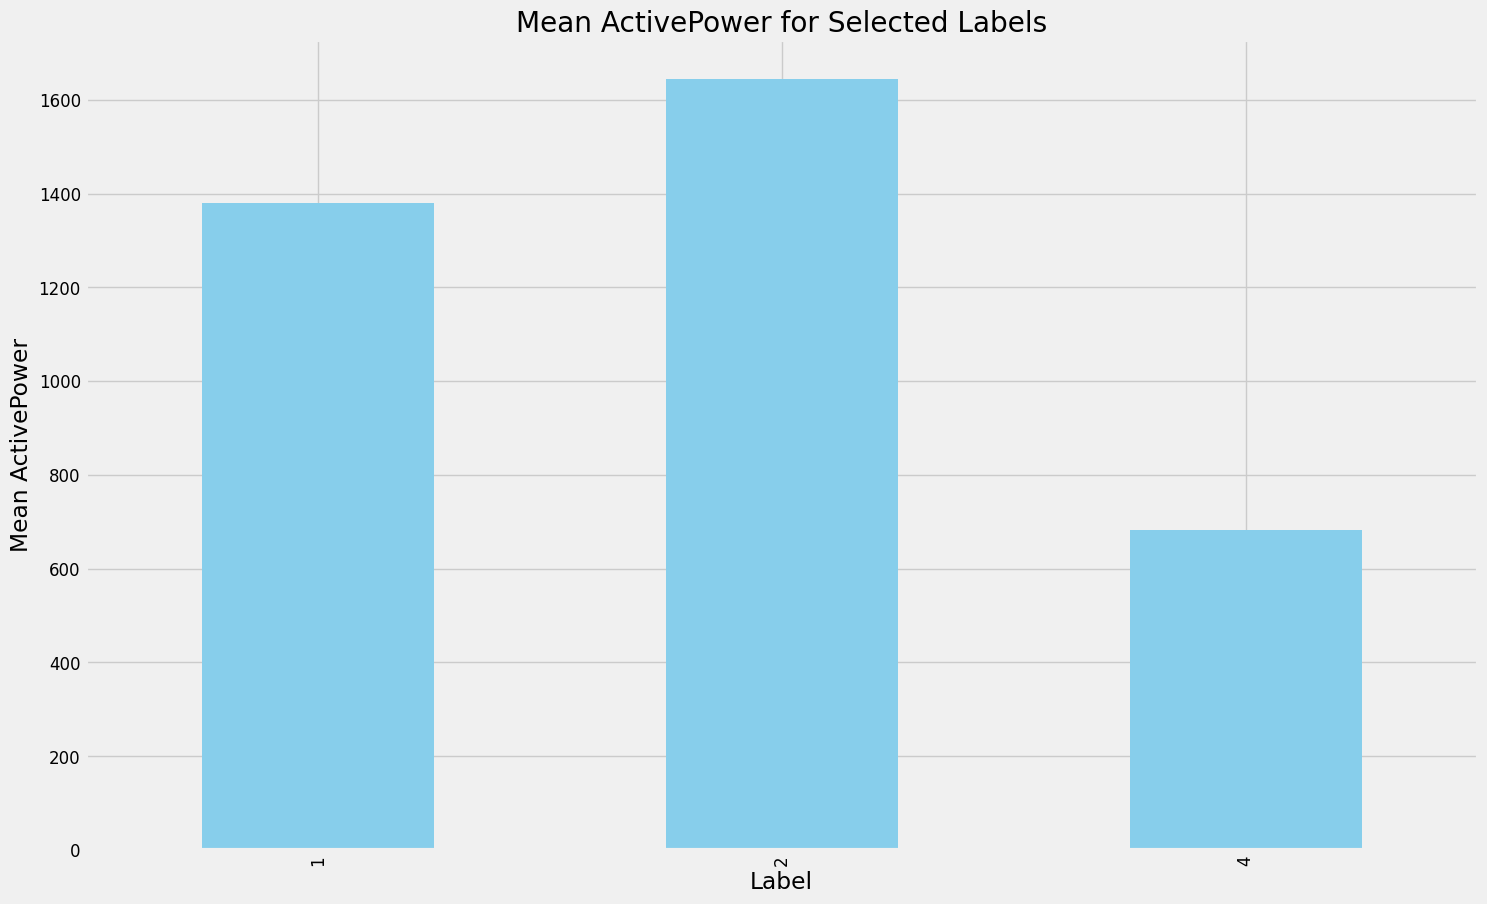

In [779]:
# Assuming your DataFrame is named df
labels_to_visualize = [1, 2, 4]

# Filter the DataFrame for the specified labels
filtered_df = y_analysis[y_analysis['label'].isin(labels_to_visualize)]

# Group by 'label' and calculate the mean of 'ActivePower'
mean_by_label = filtered_df.groupby('label')['ActivePower'].mean()

# Plot the mean values
mean_by_label.plot(kind='bar', color='skyblue')
plt.xlabel('Label')
plt.ylabel('Mean ActivePower')
plt.title('Mean ActivePower for Selected Labels')
plt.show()

In [780]:
labels_to_describe = [1, 2, 3, 4, 5, 6, 7]

# Iterate through each label and apply describe
for label in labels_to_describe:
    label_df = y_analysis[y_analysis['label'] == label]
    label_description = label_df.describe()
    print(f"Description for Label {label}:\n{label_description}\n")

Description for Label 1:
       wahing_machine  dishwasher       oven      label  ActivePower  ReactivePower  harmonic1_Real  harmonic1_Imaginary  harmonic3_Real  harmonic3_Imaginary  harmonic5_Real  harmonic5_Imaginary  harmonic7_Real  harmonic7_Imaginary    Voltage     Current  instant_power  ApparentPower  PowerFactor        THD  HarmonicDistortionIndex  Power Fluctuations  Resistance
count      2329.00000  2329.00000 2329.00000 2329.00000   2329.00000     2329.00000      2329.00000           2329.00000      2329.00000           2329.00000      2329.00000           2329.00000      2329.00000           2329.00000 2329.00000  2329.00000     2329.00000     2329.00000   2329.00000 2329.00000               2329.00000          2329.00000  2329.00000
mean          0.00000     0.00000    1.00000    1.00000   1379.86090      154.61448      -262.75761          -6502.69375        61.76141           -146.10461       -11.24060            -33.93763       -12.72321            -16.08373  233.69459 

In [781]:
y_analysis.head()

,wahing_machine,dishwasher,oven,label,label_str,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance
2023-01-01 00:00:00,0,0,0,0,AO,66.15917,66.64568,14.60000,-301.10000,16.33333,-54.93333,-15.66667,-22.13333,-7.33333,-12.60000,236.10000,280.26667,4409.22260,93.90784,0.70451,4.66139,444.70000,0.00000,0.84241
2023-01-01 00:00:30,0,0,0,0,AO,66.14803,67.02518,11.30000,-301.36667,15.70000,-55.46667,-16.03333,-21.96667,-7.90000,-13.10000,236.00000,280.33333,4433.58379,94.16972,0.70243,4.66559,442.83333,-0.00037,0.84185
2023-01-01 00:01:00,0,0,0,0,AO,66.07277,66.78661,11.06667,-301.20000,15.86667,-55.50000,-16.00000,-22.03333,-5.60000,-12.53333,236.00000,280.00000,4412.77626,93.94712,0.70330,4.66746,439.80000,-0.00251,0.84286
2023-01-01 00:01:30,0,0,0,0,AO,66.08220,67.13501,9.90000,-299.86667,16.50000,-55.00000,-16.00000,-21.90000,-9.20000,-12.26667,236.83333,279.06667,4436.42932,94.20174,0.70150,4.64664,440.63333,0.00031,0.84866
2023-01-01 00:02:00,0,0,0,0,AO,65.99967,67.19788,9.26667,-300.03333,16.13333,-55.10000,-16.13333,-21.66667,-6.60000,-11.96667,236.76667,278.80000,4435.03763,94.18870,0.70072,4.65326,436.90000,-0.00275,0.84923


In [782]:
y_analysis.dtypes

wahing_machine               int64
dishwasher                   int64
oven                         int64
label                        int64
label_str                   object
ActivePower                float64
ReactivePower              float64
harmonic1_Real             float64
harmonic1_Imaginary        float64
harmonic3_Real             float64
harmonic3_Imaginary        float64
harmonic5_Real             float64
harmonic5_Imaginary        float64
harmonic7_Real             float64
harmonic7_Imaginary        float64
Voltage                    float64
Current                    float64
instant_power              float64
ApparentPower              float64
PowerFactor                float64
THD                        float64
HarmonicDistortionIndex    float64
Power Fluctuations         float64
Resistance                 float64
dtype: object

# First Classifier and Performance

## KNN Classifier

In [783]:
y = Y['label']


In [784]:
df.head()

,Voltage,Current,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,wahing_machine,dishwasher,oven,Dominant_Frequency,Dominant_Period,Std_Current,Total_Energy,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,year,month,quarter,hour,weekday,weekofyear,dayofmonth,date,season
2023-01-01 00:00:00,236.10000,280.26667,66.15917,66.64568,14.60000,-301.10000,16.33333,-54.93333,-15.66667,-22.13333,-7.33333,-12.60000,0.00000,0.00000,0.00000,0.10000,10.00000,1.92861,2356590.00000,67.25400,68.37631,285.00000,17.00000,-295.00000,17.00000,-53.00000,-15.00000,-21.00000,-2.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:00:30,236.00000,280.33333,66.14803,67.02518,11.30000,-301.36667,15.70000,-55.46667,-16.03333,-21.96667,-7.90000,-13.10000,0.00000,0.00000,0.00000,0.00000,inf,2.98656,2357862.00000,67.72200,68.42131,287.00000,15.00000,-295.00000,17.00000,-54.00000,-15.00000,-19.00000,-2.00000,-6.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:01:00,236.00000,280.00000,66.07277,66.78661,11.06667,-301.20000,15.86667,-55.50000,-16.00000,-22.03333,-5.60000,-12.53333,0.00000,0.00000,0.00000,0.03333,30.00000,2.66523,2352206.00000,67.72600,68.21231,287.00000,13.00000,-297.00000,16.00000,-54.00000,-15.00000,-21.00000,-2.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:01:30,236.83333,279.06667,66.08220,67.13501,9.90000,-299.86667,16.50000,-55.00000,-16.00000,-21.90000,-9.20000,-12.26667,0.00000,0.00000,0.00000,0.03333,30.00000,2.37709,2336510.00000,67.54400,68.13331,285.00000,13.00000,-292.00000,18.00000,-53.00000,-15.00000,-21.00000,-2.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1
2023-01-01 00:02:00,236.76667,278.80000,65.99967,67.19788,9.26667,-300.03333,16.13333,-55.10000,-16.13333,-21.66667,-6.60000,-11.96667,0.00000,0.00000,0.00000,0.43333,2.30769,1.76947,2331974.00000,66.59600,68.10231,281.00000,12.00000,-295.00000,18.00000,-54.00000,-15.00000,-20.00000,-2.00000,-7.00000,6,1,2023,1,1,0,6,0,1,2023-01-01,1


In [787]:
x_analysis = pd.concat([x_analysis, df['maxActPower'], df['maxReactPower'], df['maxCurrent'], df['maxHarmonic1_Real'], df['maxHarmonic1_Imaginary'], df['maxHarmonic3_Real'], df['maxHarmonic3_Imaginary'], df['maxHarmonic5_Real'], df['maxHarmonic5_Imaginary'], df['maxHarmonic7_Real'], df['maxHarmonic7_Imaginary'], df['dayofweek'], df['dayofyear'], df['month'], df['hour'], df['weekday'], df['weekofyear'], df['dayofmonth'], df['season'], df['Dominant_Frequency'], df['Std_Current'], df['Total_Energy']], axis=1)

In [788]:
x_analysis.head()

,ActivePower,ReactivePower,harmonic1_Real,harmonic1_Imaginary,harmonic3_Real,harmonic3_Imaginary,harmonic5_Real,harmonic5_Imaginary,harmonic7_Real,harmonic7_Imaginary,Voltage,Current,instant_power,ApparentPower,PowerFactor,THD,HarmonicDistortionIndex,Power Fluctuations,Resistance,maxActPower,maxReactPower,maxCurrent,maxHarmonic1_Real,maxHarmonic1_Imaginary,maxHarmonic3_Real,maxHarmonic3_Imaginary,maxHarmonic5_Real,maxHarmonic5_Imaginary,maxHarmonic7_Real,maxHarmonic7_Imaginary,dayofweek,dayofyear,month,hour,weekday,weekofyear,dayofmonth,season,Dominant_Frequency,Std_Current,Total_Energy
2023-01-01 00:00:00,66.15917,66.64568,14.60000,-301.10000,16.33333,-54.93333,-15.66667,-22.13333,-7.33333,-12.60000,236.10000,280.26667,4409.22260,93.90784,0.70451,4.66139,444.70000,0.00000,0.84241,67.25400,68.37631,285.00000,17.00000,-295.00000,17.00000,-53.00000,-15.00000,-21.00000,-2.00000,-7.00000,6,1,1,0,6,0,1,1,0.10000,1.92861,2356590.00000
2023-01-01 00:00:30,66.14803,67.02518,11.30000,-301.36667,15.70000,-55.46667,-16.03333,-21.96667,-7.90000,-13.10000,236.00000,280.33333,4433.58379,94.16972,0.70243,4.66559,442.83333,-0.00037,0.84185,67.72200,68.42131,287.00000,15.00000,-295.00000,17.00000,-54.00000,-15.00000,-19.00000,-2.00000,-6.00000,6,1,1,0,6,0,1,1,0.00000,2.98656,2357862.00000
2023-01-01 00:01:00,66.07277,66.78661,11.06667,-301.20000,15.86667,-55.50000,-16.00000,-22.03333,-5.60000,-12.53333,236.00000,280.00000,4412.77626,93.94712,0.70330,4.66746,439.80000,-0.00251,0.84286,67.72600,68.21231,287.00000,13.00000,-297.00000,16.00000,-54.00000,-15.00000,-21.00000,-2.00000,-7.00000,6,1,1,0,6,0,1,1,0.03333,2.66523,2352206.00000
2023-01-01 00:01:30,66.08220,67.13501,9.90000,-299.86667,16.50000,-55.00000,-16.00000,-21.90000,-9.20000,-12.26667,236.83333,279.06667,4436.42932,94.20174,0.70150,4.64664,440.63333,0.00031,0.84866,67.54400,68.13331,285.00000,13.00000,-292.00000,18.00000,-53.00000,-15.00000,-21.00000,-2.00000,-7.00000,6,1,1,0,6,0,1,1,0.03333,2.37709,2336510.00000
2023-01-01 00:02:00,65.99967,67.19788,9.26667,-300.03333,16.13333,-55.10000,-16.13333,-21.66667,-6.60000,-11.96667,236.76667,278.80000,4435.03763,94.18870,0.70072,4.65326,436.90000,-0.00275,0.84923,66.59600,68.10231,281.00000,12.00000,-295.00000,18.00000,-54.00000,-15.00000,-20.00000,-2.00000,-7.00000,6,1,1,0,6,0,1,1,0.43333,1.76947,2331974.00000


In [793]:
X = StandardScaler().fit_transform(x_analysis)

In [839]:
clf = KNeighborsClassifier(n_neighbors = 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=25)
scores = cross_val_score(clf, X, y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))


Accuracy: 1.00 (+/- 0.00)


In [842]:
target_names = ['AO','OW','DW','DW_OW','WM','WM_OW','WM_DW','WM_DW_OW']


In [796]:
clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [797]:
print(classification_report(y,clf.predict(X), target_names=target_names))


              precision    recall  f1-score   support

          AO       0.99      1.00      1.00    281218
          OW       0.89      0.79      0.83      2329
          DW       0.97      0.93      0.95      6177
       DW_OW       0.87      0.81      0.84       711
          WM       0.97      0.86      0.91      9916
       WM_OW       0.89      0.81      0.85       738
       WM_DW       0.93      0.84      0.88      1293
    WM_DW_OW       0.00      0.00      0.00        18

    accuracy                           0.99    302400
   macro avg       0.81      0.76      0.78    302400
weighted avg       0.99      0.99      0.99    302400



In [798]:
cm = pd.DataFrame(confusion_matrix(y, clf.predict(X)), index=target_names, columns=target_names)
cm


,AO,OW,DW,DW_OW,WM,WM_OW,WM_DW,WM_DW_OW
AO,281128,33,29,0,28,0,0,0
OW,373,1829,14,0,113,0,0,0
DW,297,72,5773,3,30,0,2,0
DW_OW,1,21,62,579,3,8,37,0
WM,1302,75,5,0,8527,7,0,0
WM_OW,0,34,14,2,67,597,24,0
WM_DW,0,1,41,77,31,56,1087,0
WM_DW_OW,0,0,0,1,0,1,16,0


## Random Forest Algorithm

In [828]:
class_weights = {0: 0.2, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 3.0}

# Initialize RandomForestClassifier with custom class weights
clf_frst = RandomForestClassifier(n_estimators=500, class_weight=class_weights, random_state=0)

scores = cross_val_score(clf_frst, X, y, cv=kf)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [845]:
clf_frst.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0,
                                     5: 1.0, 6: 1.0, 7: 3.0},
                       n_estimators=500, random_state=0)

In [846]:
print(classification_report(y,clf_frst.predict(X), target_names=target_names))

              precision    recall  f1-score   support

          AO       1.00      1.00      1.00    281218
          OW       0.99      0.99      0.99      2329
          DW       1.00      0.99      0.99      6177
       DW_OW       1.00      0.98      0.99       711
          WM       1.00      0.99      0.99      9916
       WM_OW       0.98      0.98      0.98       738
       WM_DW       0.99      0.98      0.99      1293
    WM_DW_OW       1.00      0.83      0.91        18

    accuracy                           1.00    302400
   macro avg       0.99      0.97      0.98    302400
weighted avg       1.00      1.00      1.00    302400



In [847]:
print(classification_report(y_test,clf_frst.predict(X_test), target_names=target_names))

              precision    recall  f1-score   support

          AO       1.00      1.00      1.00     84365
          OW       0.98      0.96      0.97       699
          DW       0.99      0.97      0.98      1853
       DW_OW       0.98      0.92      0.95       213
          WM       0.99      0.97      0.98      2975
       WM_OW       0.94      0.95      0.94       221
       WM_DW       0.98      0.93      0.95       388
    WM_DW_OW       1.00      0.50      0.67         6

    accuracy                           1.00     90720
   macro avg       0.98      0.90      0.93     90720
weighted avg       1.00      1.00      1.00     90720



In [851]:
predictions = clf_frst.predict(X_test)

In [852]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [853]:
print(result_df[result_df['Actual'] == 7])

                     Actual  Predicted
2023-01-06 06:39:30       7          6
2023-01-06 06:38:30       7          5
2023-03-24 17:10:00       7          7
2023-03-24 17:11:00       7          7
2023-01-06 06:41:00       7          7
2023-01-06 06:42:30       7          6


In [854]:
from sklearn.metrics import accuracy_score

# Assuming X_test and y_test are your testing data
baseline_predictions = clf_frst.predict(X_test)
baseline_accuracy = accuracy_score(y_test, baseline_predictions)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.9974


In [855]:
clf_frst.feature_importances_

array([0.0282, 0.0418, 0.0107, 0.0316, 0.0554, 0.0354, 0.106 , 0.0406,
       0.1226, 0.0342, 0.0023, 0.0067, 0.0628, 0.0424, 0.0058, 0.0055,
       0.0366, 0.005 , 0.007 , 0.0582, 0.0599, 0.0085, 0.0091, 0.0255,
       0.0126, 0.0326, 0.0105, 0.0233, 0.0131, 0.0231, 0.0021, 0.0037,
       0.0008, 0.0074, 0.0021, 0.0023, 0.0039, 0.0003, 0.0011, 0.0124,
       0.007 ])

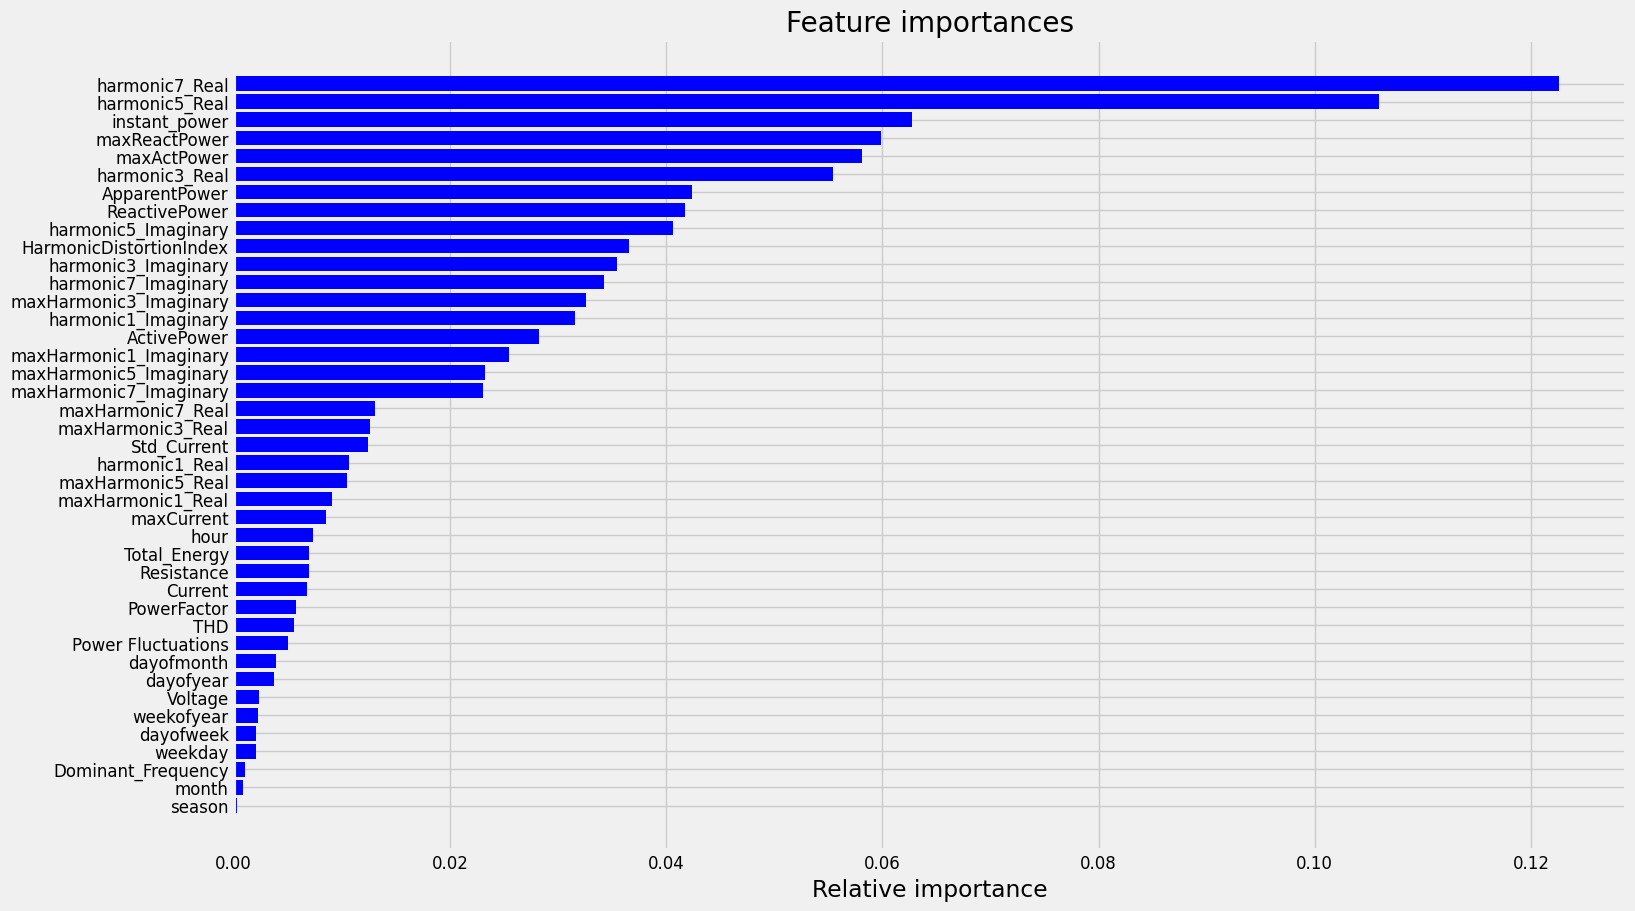

In [856]:
# features = x_analysis.columns
features = x_analysis.columns
importances = clf_frst.feature_importances_
indices = np.argsort(importances)

plt.title('Feature importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()